# AllLife Credit Card Customer Segmentation

Background: AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  

Another  insight from  the market  research  was  that  the  customers perceive the support services of the back poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective:
To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank. 
## Key Questions:
1.How many different segments of customers are there?
2.How are these segments different from each other?
3.What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?

## Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer  has,  and  different  channels  through  which  customer  has contacted  the  bank  for  any  queries,  different  channels  include  visiting  the  bank, online and through a call centre. 


Criteria	Points
EDA
- Univariate analysis (5 marks) 
- Bivariate analysis ( 4 marks) 
- Use appropriate visualizations to identify the patterns and insights (5 marks) 
- Any other exploratory deep dive (1 marks)

Kmeans
- Apply K-means (5marks) 
- Elbow curve (3 marks) 
- Silhouette Score ( 2 marks) 
- figure out appropriate number of cluster (5 marks)

Hierarchical Clustering
- Apply Hierarchical clustering with different linkage methods 
- Plot dendrograms 
- Choose appropriate number of cluster

Clusters Comparison
- Compare cluster K-means clusters and Hierarchical clusters (2 marks) 
- Perform cluster profiling (2 marks) 
- Derive Insights (4 marks)

Conclusion and Business Recommendation
- Business conclusion and Recommendation - (7 marks)


## Importing Libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
data=pd.read_excel("/Users/aurelienvallier/Desktop/AI & Machine Learning/5- Unsupervised Learning/Assignment/Credit Card Customer Data.xlsx")
data.tail(50)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
610,611,16253,39000,7,2,1,0
611,612,80623,46000,7,4,1,3
612,613,94391,157000,9,1,14,1
613,614,50598,94000,9,1,11,0
614,615,40019,163000,8,1,7,1
615,616,77910,131000,9,1,10,1
616,617,89832,96000,10,1,11,2
617,618,98216,136000,8,0,13,0
618,619,54495,121000,7,0,13,2
619,620,47650,158000,7,0,13,0


In [5]:
data.shape # Conclusion: small dataset

(660, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
#The column, Sl_No, Customer Key are serial number for each observation and customer ID respectively. 
#You can ignore them in your analysis.
#We will drop them

In [9]:
data=data.drop(['Sl_No', "Customer Key"], axis=1)

In [10]:
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


# Univariate Analysis

In [11]:
data.isna().sum() #No missing value

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [12]:
# We are going to use 2 set of plots, one to get an overview and one to get more details

## Overview 

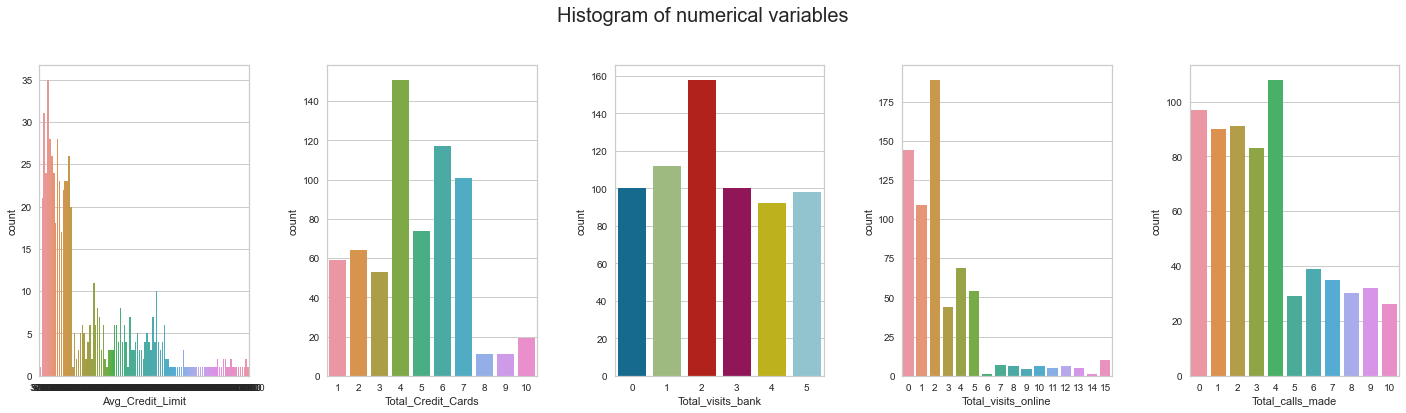

In [13]:
all_col = data.iloc[:,:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=data[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

- Overview shows the most occurences on the lower side in terms of average credit card limits, total visit online and total call made 
- For total credit cards and total visit banks, the data seems more centered around middle value.
- Lets get more into the details for further info.

In [14]:
#Lets use a function to visualize 
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


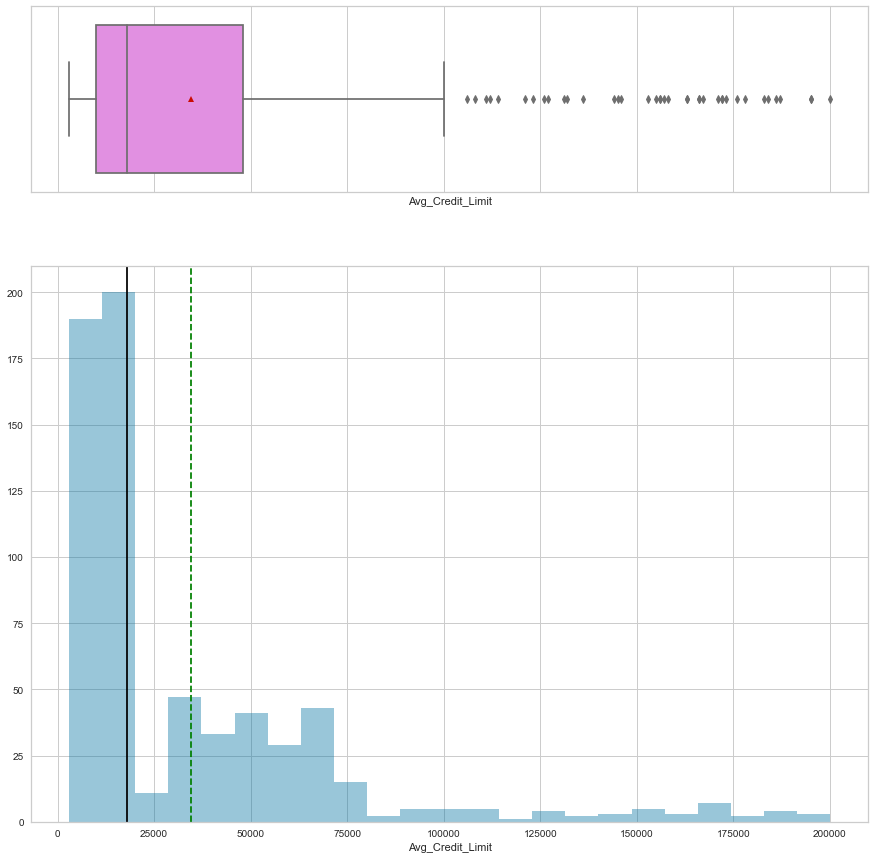

In [15]:
histogram_boxplot(data['Avg_Credit_Limit'])

- Clearly right skewed, indicating most of the customers have small credit limits but also extensive range of limit exist up to a very high amount
- Presence of many outliers


/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


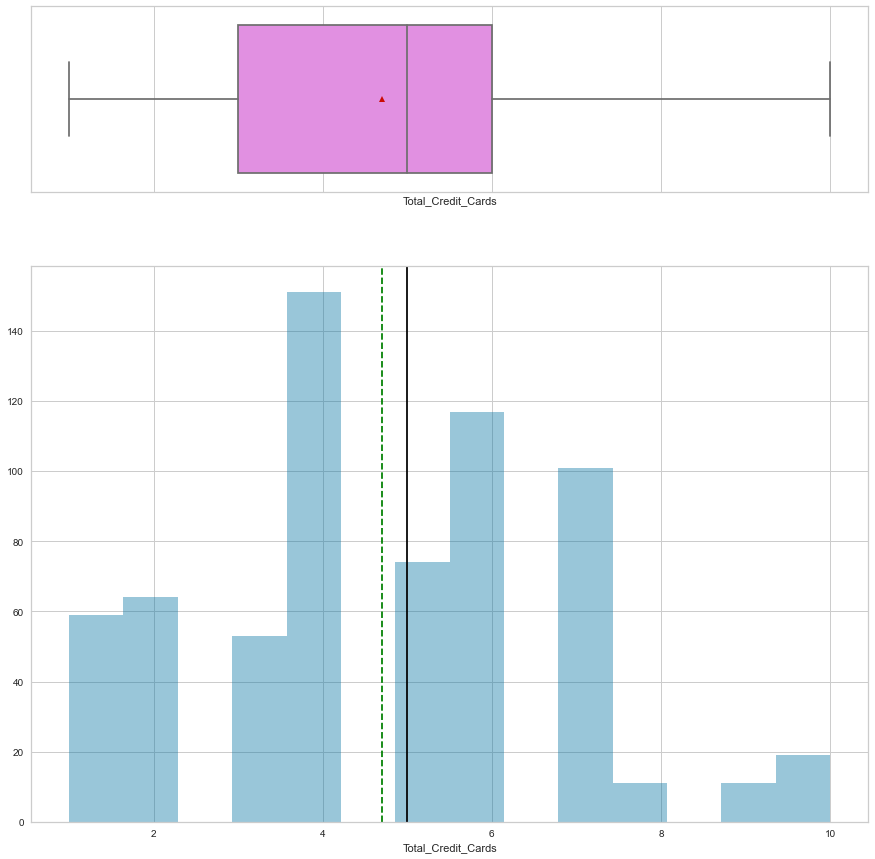

In [16]:
histogram_boxplot(data['Total_Credit_Cards'])

- Slightly left skewed but almost normal distribution
- Most of the customers have between 3 and 6 credit cards, average close to 5.
- No outliers

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


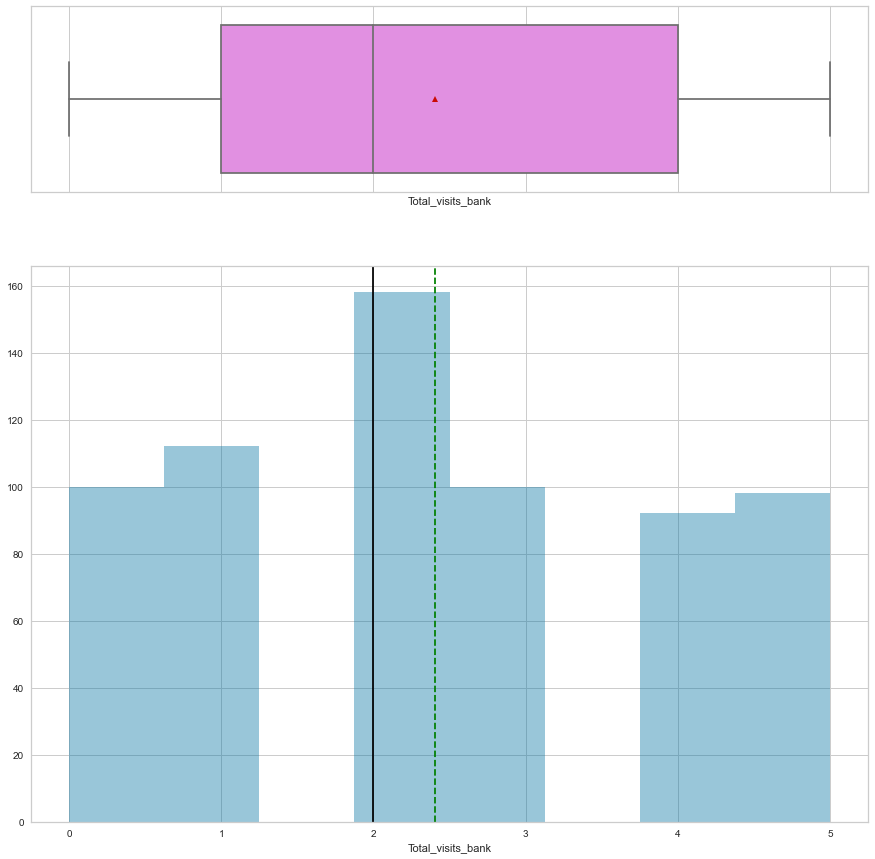

In [17]:
histogram_boxplot(data['Total_visits_bank'])

- Slightly right skewed
- Most of customers visit between 1-4 times with the most common being 2 times
- no outliers

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


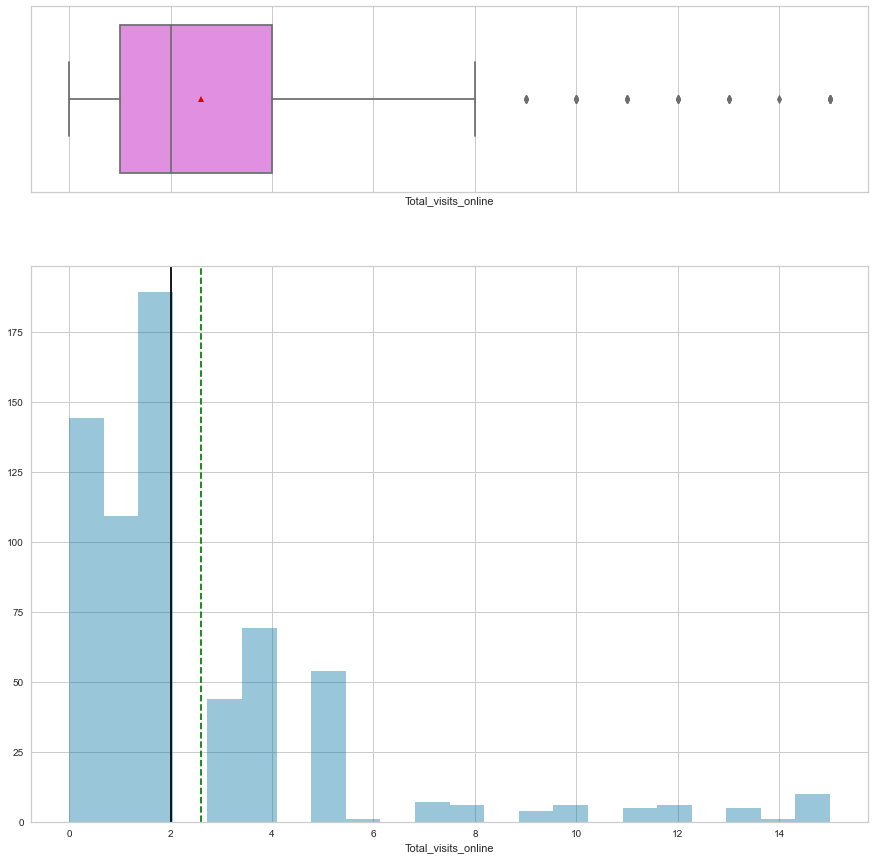

In [18]:
histogram_boxplot(data['Total_visits_online'])

- Right skewed
- Most customers visit 1-4 times online
- A lot of outliers especially on the upper side (>8 visits)

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


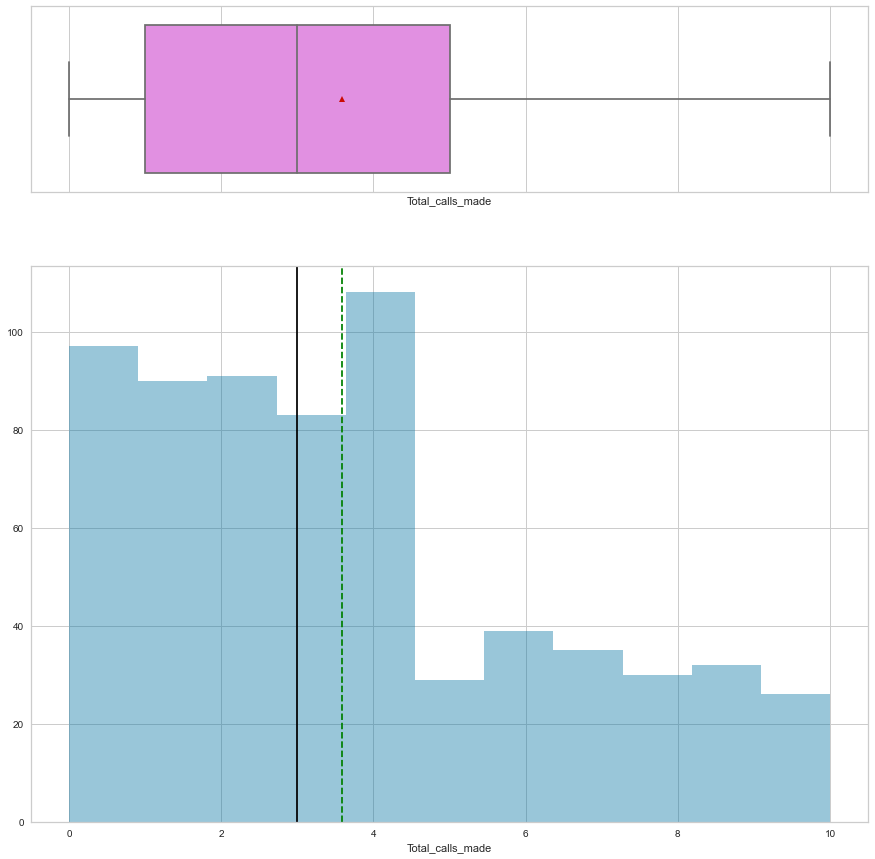

In [19]:
histogram_boxplot(data['Total_calls_made'])

- Slighty right skewed
- Most customers make between 1 to 5 calls, average being 3.6 calls and mode being 4 calls. This seems a lot of calls.

# Bivariate Analysis

We do not have target variable (unsupervised). We will try to check what the paiplot brings

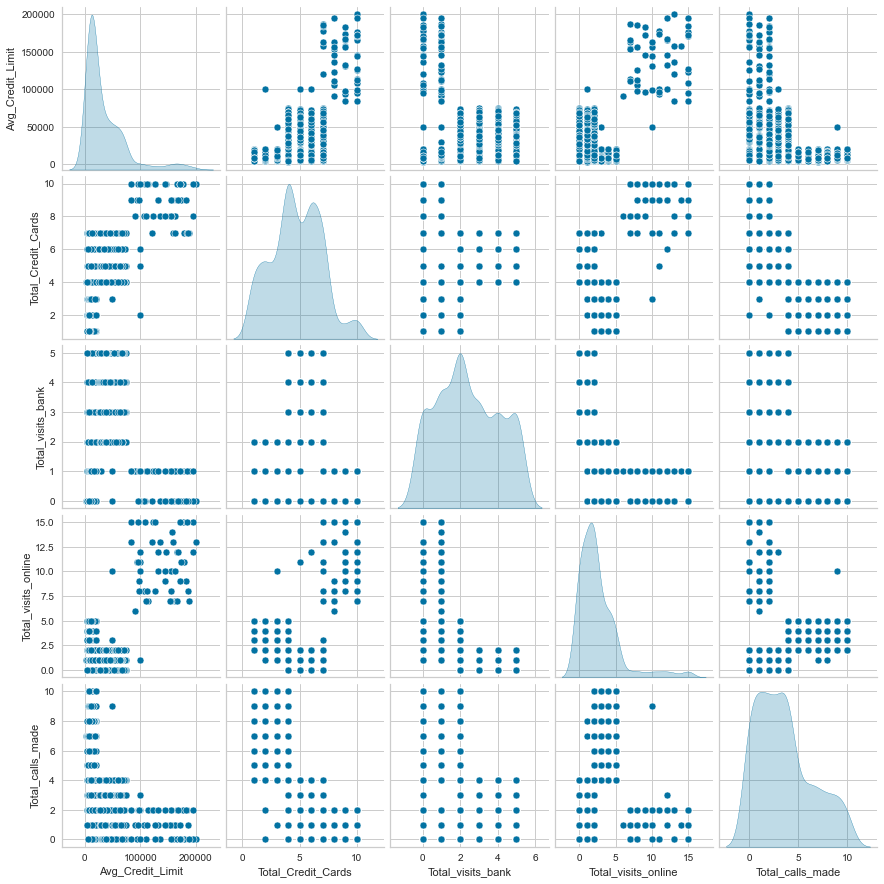

In [20]:
sns.pairplot(data=data, diag_kind="kde")

- KDE seems to indicate multi modal pattern for most variables
- Very sharp angle found in total visit online and average credit limit indicating a strong factor. 3 to 4 factors possible for average credit limit and visit online.

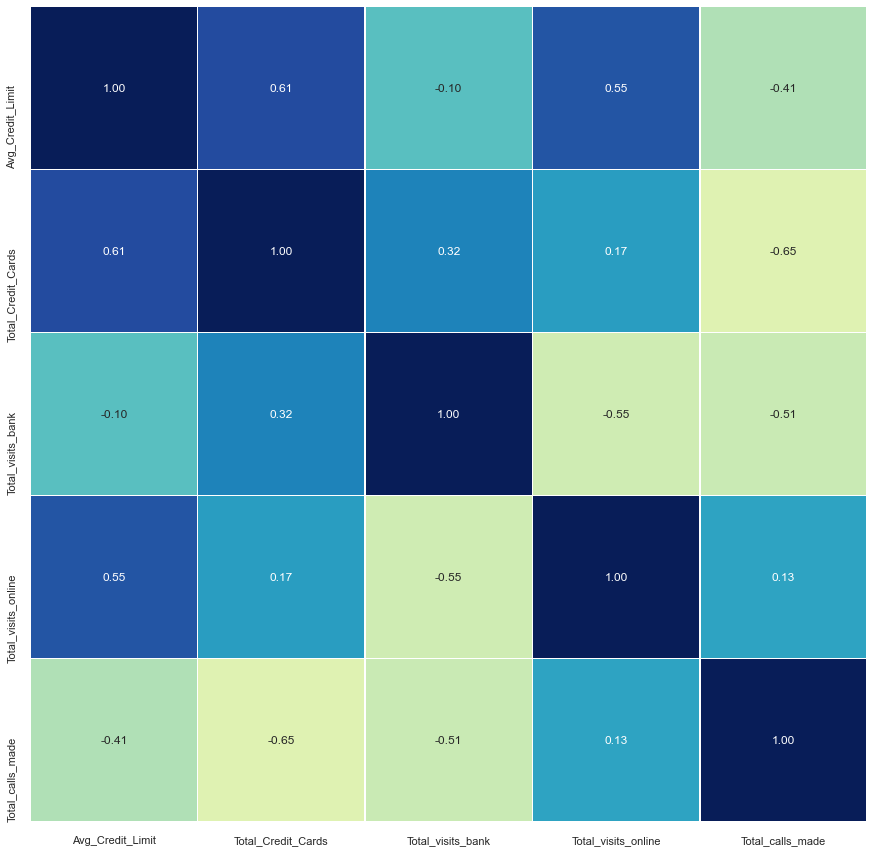

In [21]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

- Overall quite some correlations between the variables indicating not so independant variables.
- Link between them is logical for most, for eg. total credit limit with number of credit cards and number of visits online and total call made with total credit cards
- an interesting one is strong correlation between total visit online and total visit to bank

## Use appropriate visualizations to identify the patterns and insights
## Any other exploratory deep dive

From the univariate, bivariate and EDA, we find the following insights:
- In general Clients have many credit cards and big to very big credit limits.
- Various variables seem to have quite some correlation to each other, questioning the true independance between them.
- They call the bank a lot and visit the bank a lot.
- Total visit online, call to the banks and total visit to the banks seem correlated, which indicates that each of those communication means do not substitute one another. The online/call helpdesk might not be the most efficient and customer might have to come to the bank for solutions.
- Multimodal pattern (not normal distribution) seems to indicate multiple factors rather than single or two factors


# Kmeans




## Apply K-means

In [240]:
# Scaling the data
scaler=StandardScaler()
subset=data[all_col].copy()
subset_scaled=scaler.fit_transform(subset)  
#Creating a dataframe from the scaled data
subset_scaled_data=pd.DataFrame(subset_scaled,columns=subset.columns)

In [24]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction=model.predict(subset_scaled_data)
    distortion=sum(np.min(cdist(subset_scaled_data, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_data.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)



Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9430692150070754
Number of Clusters: 7 	Average Distortion: 0.9095661498049182
Number of Clusters: 8 	Average Distortion: 0.8919930642847458


## Elbow curve



Text(0.5, 1.0, 'Selecting k with the Elbow Method')

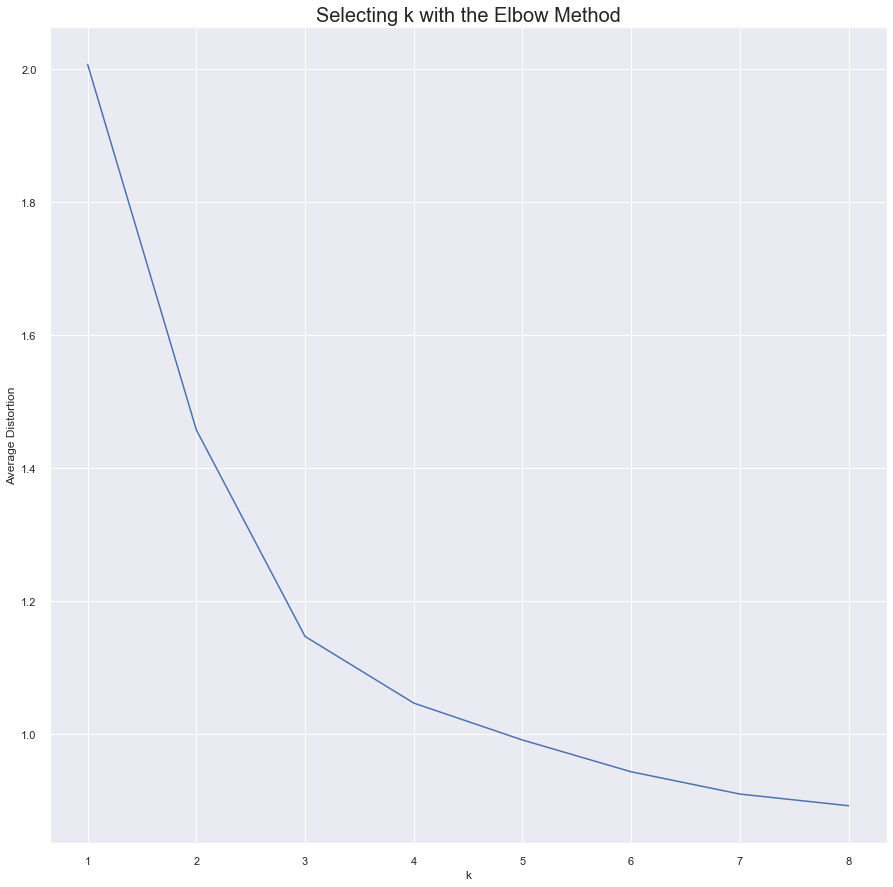

In [25]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

Elbow method indicates 3 to 5 to be the right value of K

## Silhouette

In [26]:
sil_score = []
cluster_list = list(range(2,8))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663230405)
For n_clusters = 3, silhouette score is 0.5157182558882754)
For n_clusters = 4, silhouette score is 0.35566706193773706)
For n_clusters = 5, silhouette score is 0.2717470361094591)
For n_clusters = 6, silhouette score is 0.24820147310005075)
For n_clusters = 7, silhouette score is 0.24941800702881664)


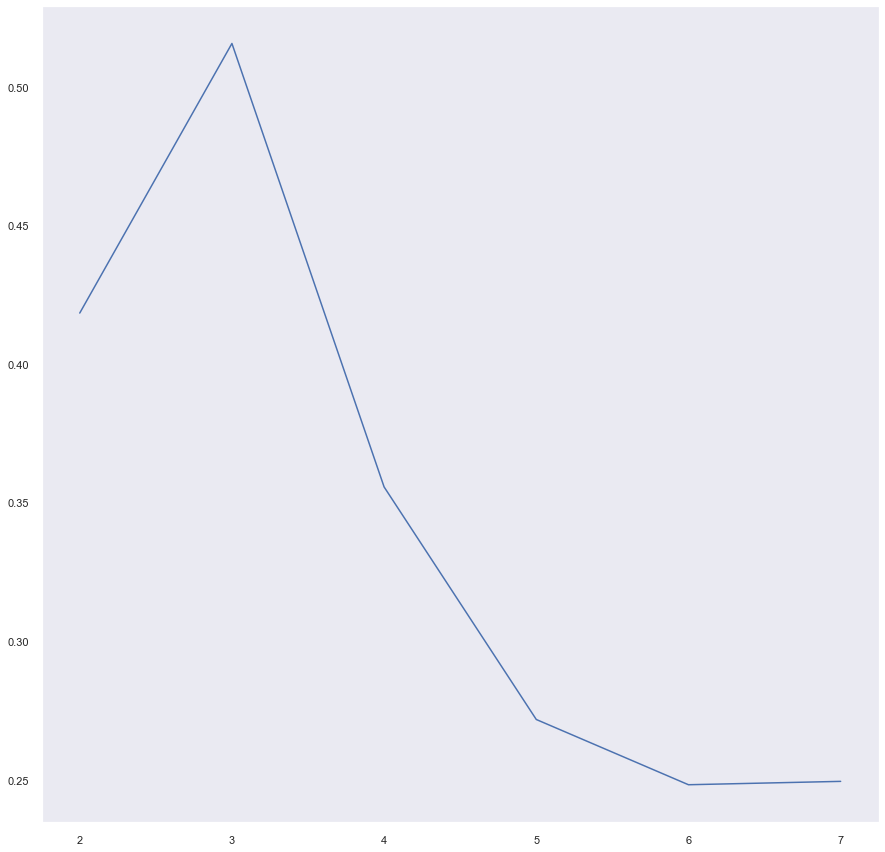

In [27]:
plt.plot(cluster_list,sil_score)
plt.grid()

Silouhette analysis show best value is for K=3 (silhouette=0.51) then a sharp drop for K=4 (0.35) and a futher drop for K=5 (0.27(.

# Selecting the right K number

We will run some silouette visualiser on values 3,4 and 5 to help select the right value

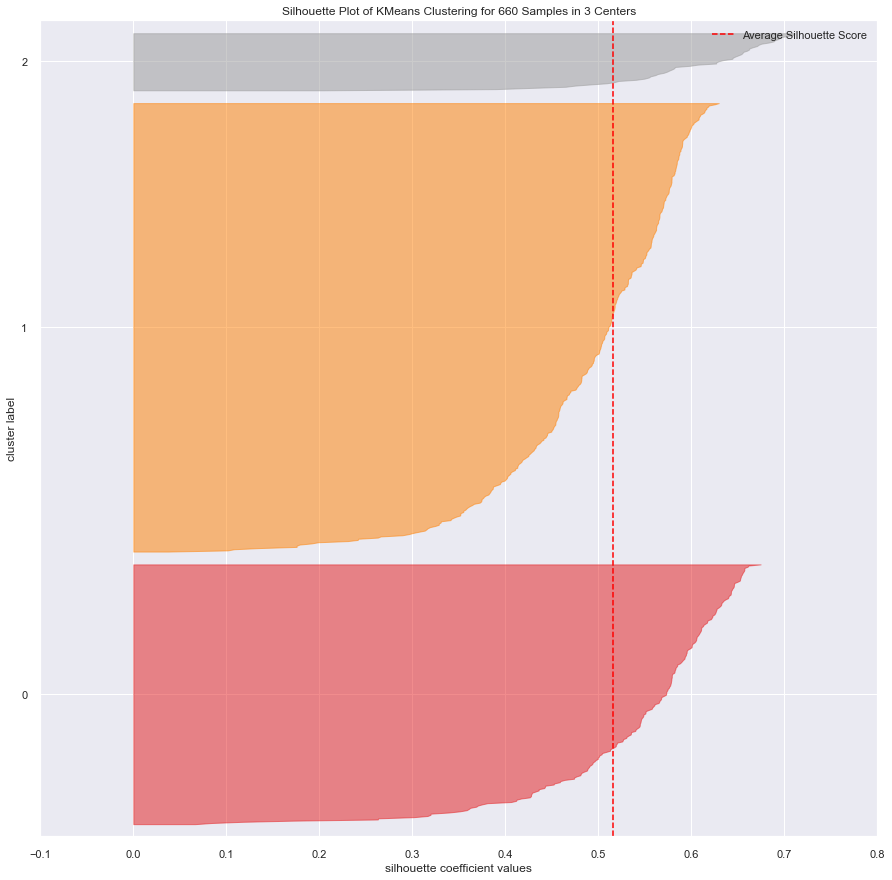

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_data)    
visualizer.show()

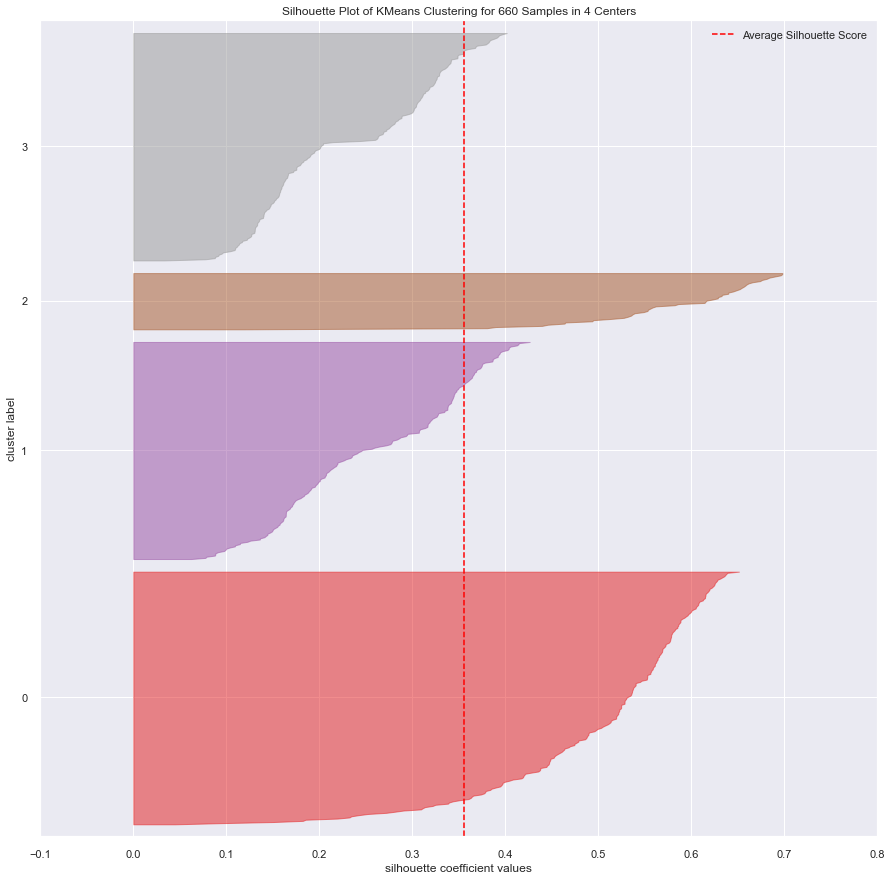

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_data)    
visualizer.show()

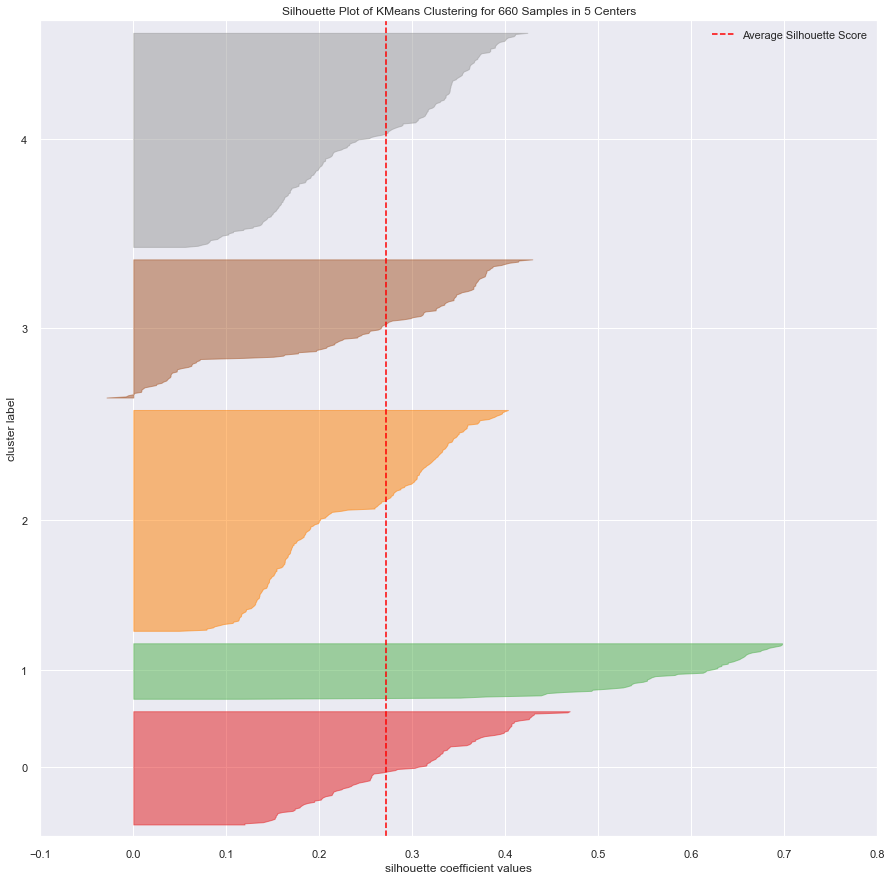

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_data)    
visualizer.show()

Based on the above, we will choose K=4 as it gives a good result from the Elbow method and a decent result with the silouhette method.

## Lets apply Kmeans based on 4 clusters


In [222]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_data)
prediction= kmeans.predict(subset_scaled_data)

In [110]:
# Lets visualise the profile of the 4 clusters
data['K_means_segments'] = kmeans.labels_
cluster_profile_kmeans_average = data.groupby('K_means_segments').mean()
cluster_profile_kmeans_average

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
K_means_segments,,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377,1.984925
1,12167.420814,2.393665,0.927602,3.574661,6.923077,0.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000
3,31226.315789,5.478947,4.515789,1.010526,1.936842,2.000000


In [111]:
cluster_profile_kmeans_count = data.groupby('K_means_segments').count()
cluster_profile_kmeans_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
K_means_segments,,,,,,
0,199,199,199,199,199,199
1,221,221,221,221,221,221
2,50,50,50,50,50,50
3,190,190,190,190,190,190



# Hierarchical Clustering
- Apply Hierarchical clustering with different linkage methods 
- Plot dendrograms 
- Choose appropriate number of cluster

In [31]:
subset_scaled_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

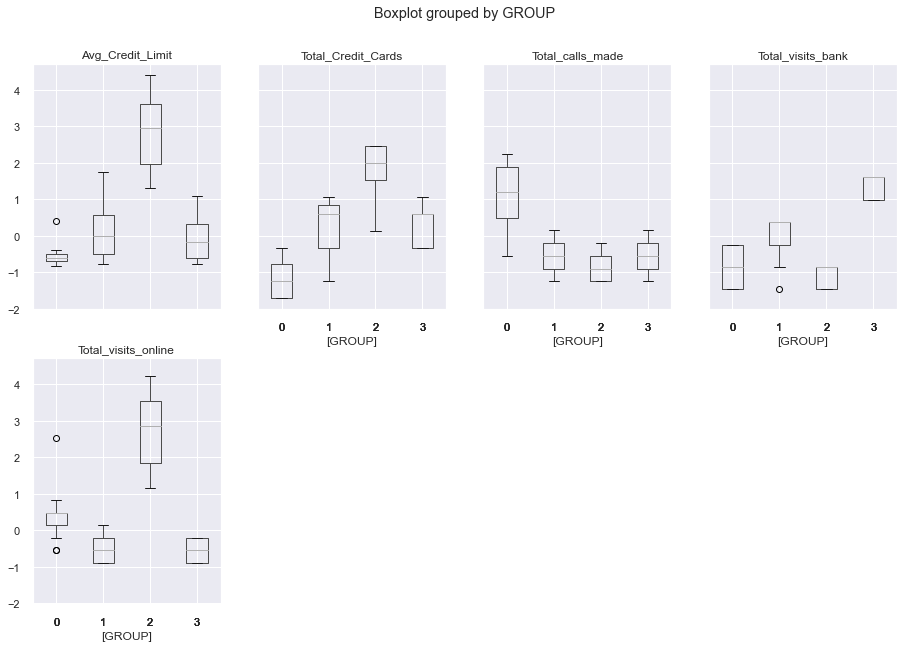

In [234]:
#Visualize Kmeans (K=4) through boxplot
subset_scaled_data["GROUP"] = prediction
subset_scaled_data.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# Let Import the agglomerative model and other needed elements

In [32]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

# We will simulate few linkage methods:
Using the Agglomerative method:
- Linkage 1 (Z1): Ward, Euclidian distance
- Linkage 2 (Z2): Min Linkage, Euclidian distance
- Linkage 3 (Z3): Max Linkage, Euclidian distance
- Linkage 4 (Z4): Centroid, Euclidian distance
- Linkage 5 (Z5): Average, Euclidian distance

In [98]:
# We try with 4 clusters using ward
model1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
Ward_Euclidian_4clusters= model1.fit(subset_scaled_data)

## Z1 (Ward)

In [35]:
# Cophenet coefficient for Z1 using 4 clusters
Z1 = linkage(subset_scaled_data, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z1 , pdist(subset_scaled_data))
c

0.7415156284827493

Cophenet is .74 which is ok but not great

In [92]:
# Lets visualize what the profile of customers in those 4 clusters look like using Z1
data['labels'] = model1.labels_
data.head(10)
custDataClust_ward = data.groupby(['labels'])
custDataClust_ward_mean=custDataClust_ward.mean()
custDataClust_ward_mean

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,0.982222
1,38298.429319,5.670157,2.523560,0.947644,2.099476,0.109948
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
3,29474.226804,5.365979,4.448454,1.010309,1.891753,2.829897


In [189]:
custDataClust_ward_count=custDataClust_ward.count()
custDataClust_ward_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,225,225,225,225,225,225
1,191,191,191,191,191,191
2,50,50,50,50,50,50
3,194,194,194,194,194,194


## Z1 (Ward) Dendogram

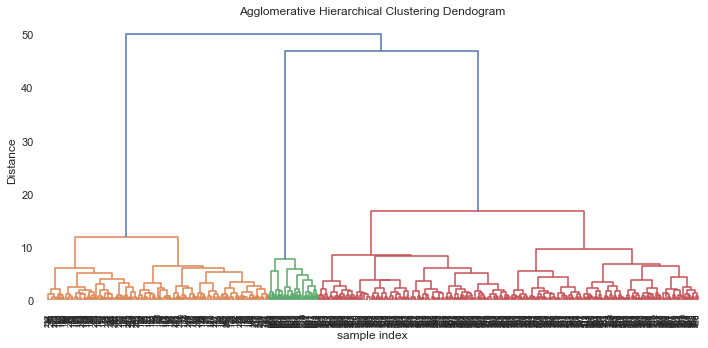

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [39]:
# Dendogram is not readable, so we will truncate it

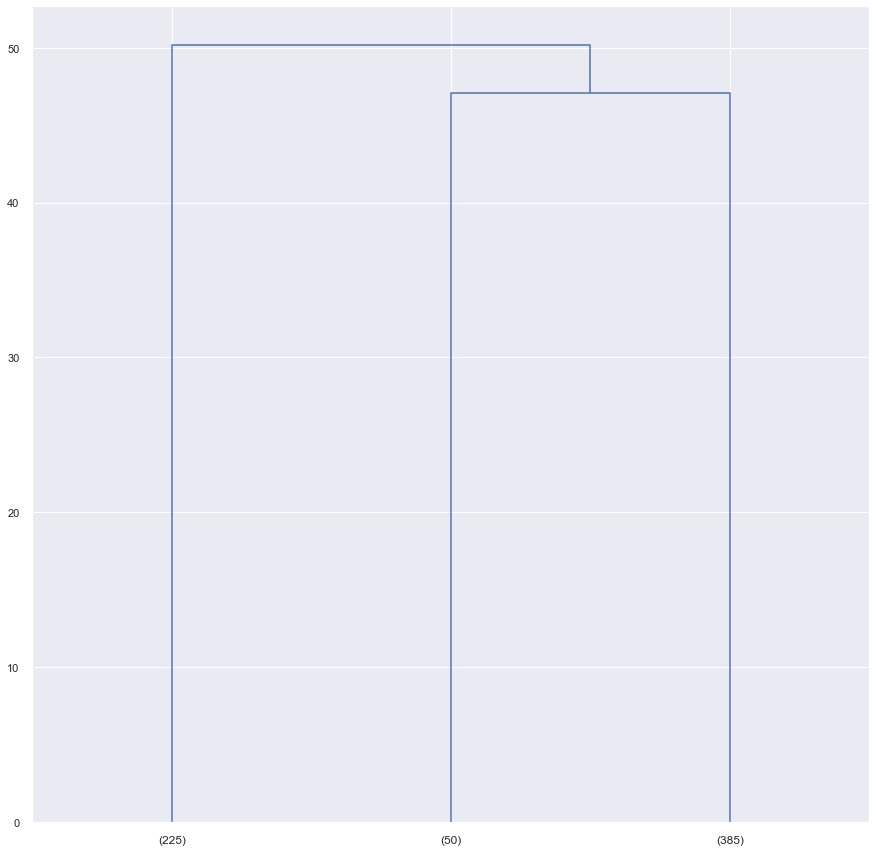

In [40]:
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

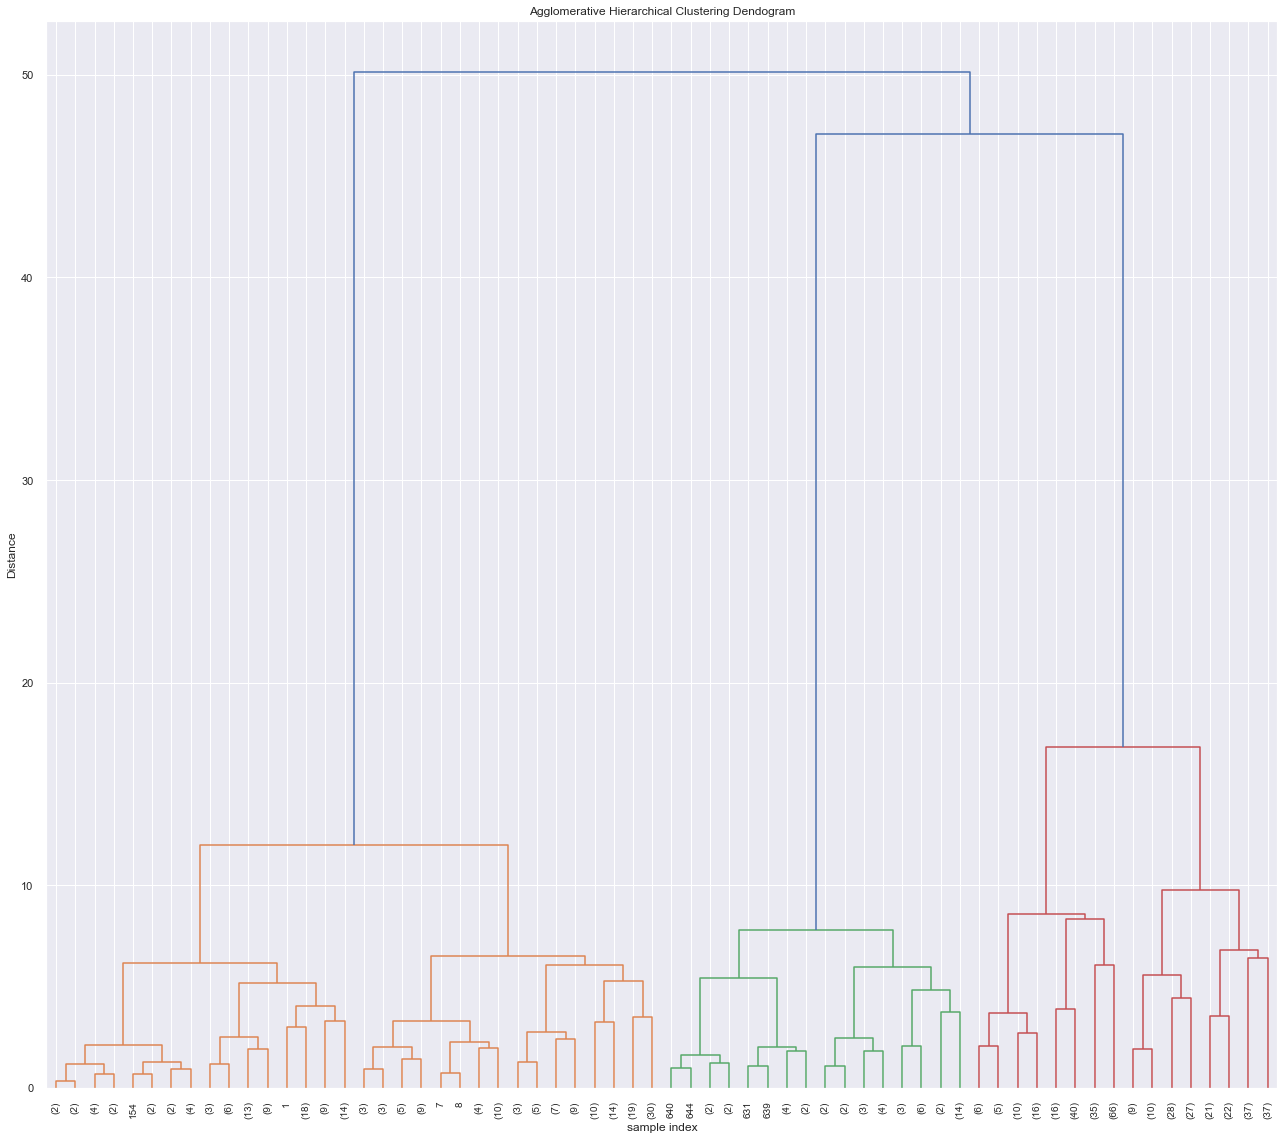

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1,leaf_rotation=90.0,p=5,color_threshold=47,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## Single Linkage Method

In [44]:
# Cophenet coefficient for Z2

Z2 = linkage(subset_scaled_data, metric='euclidean', method='single')
c, coph_dists = cophenet(Z2 , pdist(subset_scaled_data))
c

0.7391220243806552

Cophenet is not fantastic about same as when linkage is ward

## Z2 dendogram

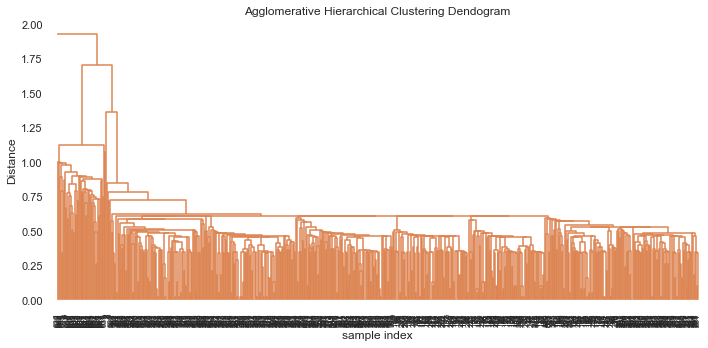

In [45]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [46]:
# let truncate it as otherwise hard to read

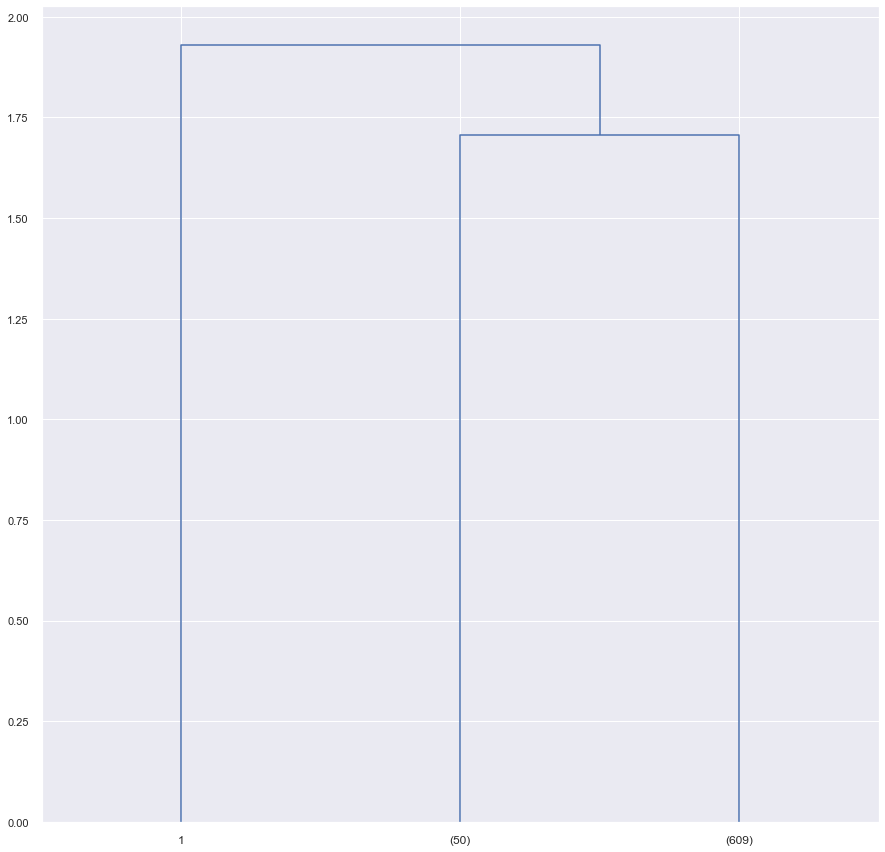

In [47]:
dendrogram(
    Z2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

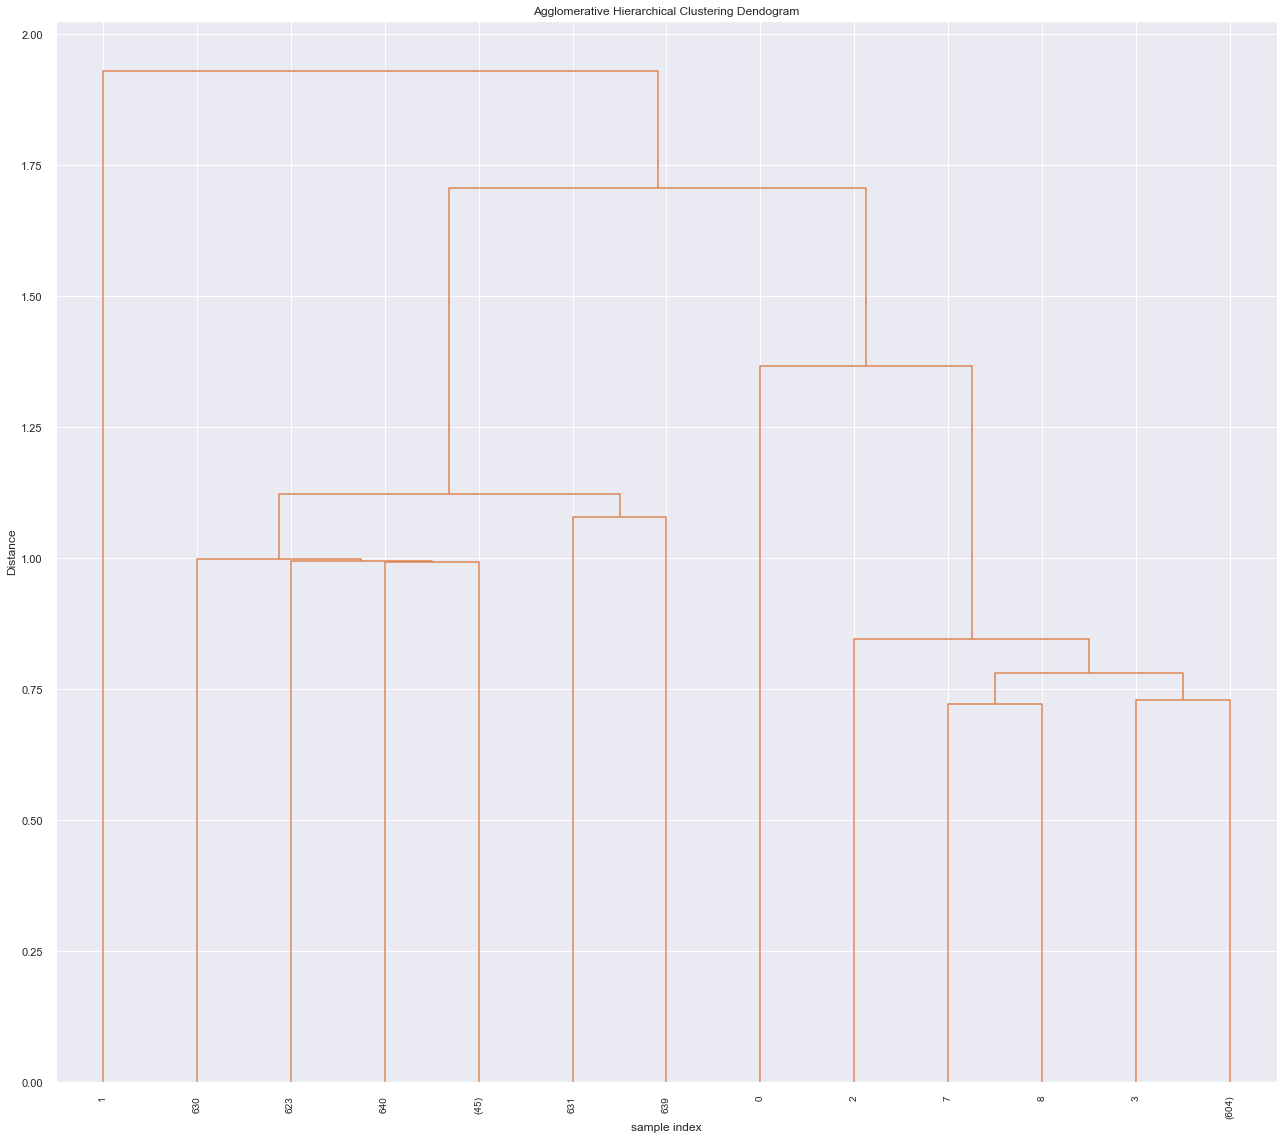

In [48]:

plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2,leaf_rotation=90.0,p=5,color_threshold=47,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## Single Profile

In [93]:
# Lets visualize what the (average) profile of customers in those 4 clusters look like using Z2
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='single')
Ward_Euclidian= model2.fit(subset_scaled_data)
data['labels'] = model2.labels_
data.head(10)
custDataClust_single = data.groupby(['labels'])
custDataClust_single_mean=custDataClust_single.mean()
custDataClust_single_mean

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
1,50000.000000,3.000000,0.000000,10.000000,9.000000,1.000000
2,25685.855263,4.381579,2.557566,1.914474,3.786184,1.299342
3,100000.000000,2.000000,1.000000,1.000000,0.000000,0.000000


In [116]:
custDataClust_single_count=custDataClust_single.count()
custDataClust_single_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,50,50,50,50,50,50
1,1,1,1,1,1,1
2,608,608,608,608,608,608
3,1,1,1,1,1,1


## Complete Linkage Method

## Z3 Cophenet

In [51]:
# Cophenet coefficient for Z3

Z3 = linkage(subset_scaled_data, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z3 , pdist(subset_scaled_data))
c

0.8599730607972423

Cophenet improves using complete linkage

## Z3 Dendogram

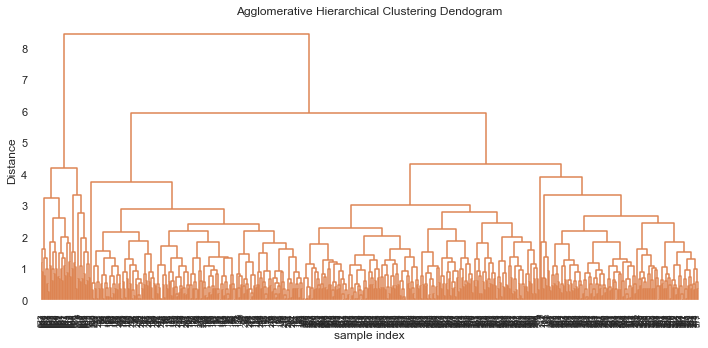

In [52]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

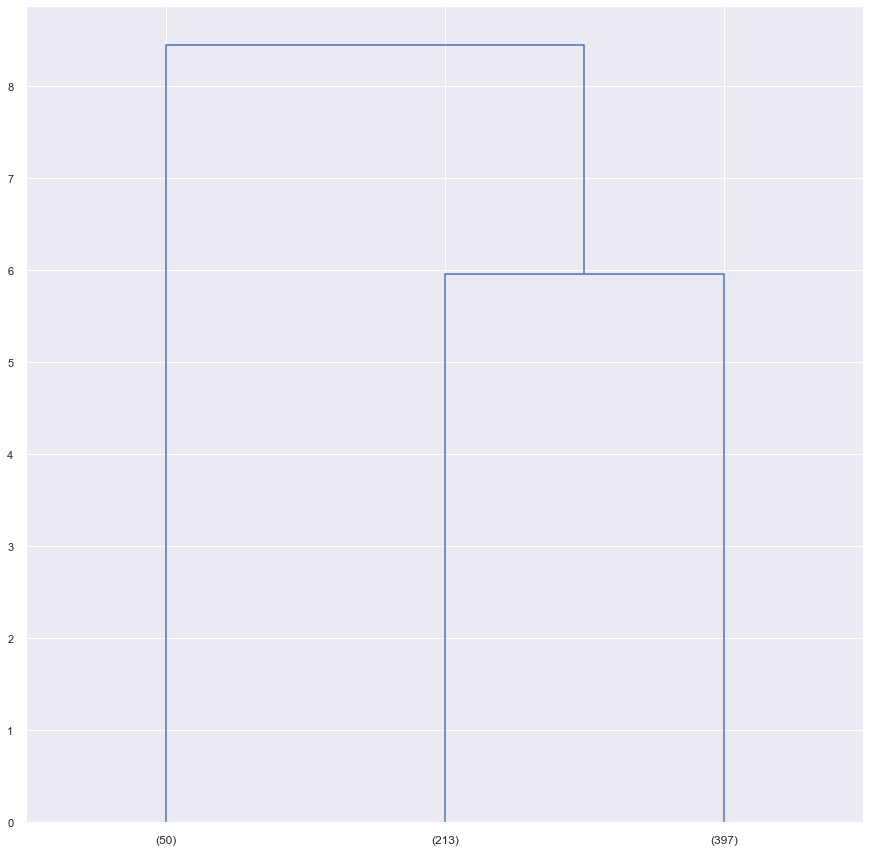

In [53]:
dendrogram(
    Z3,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

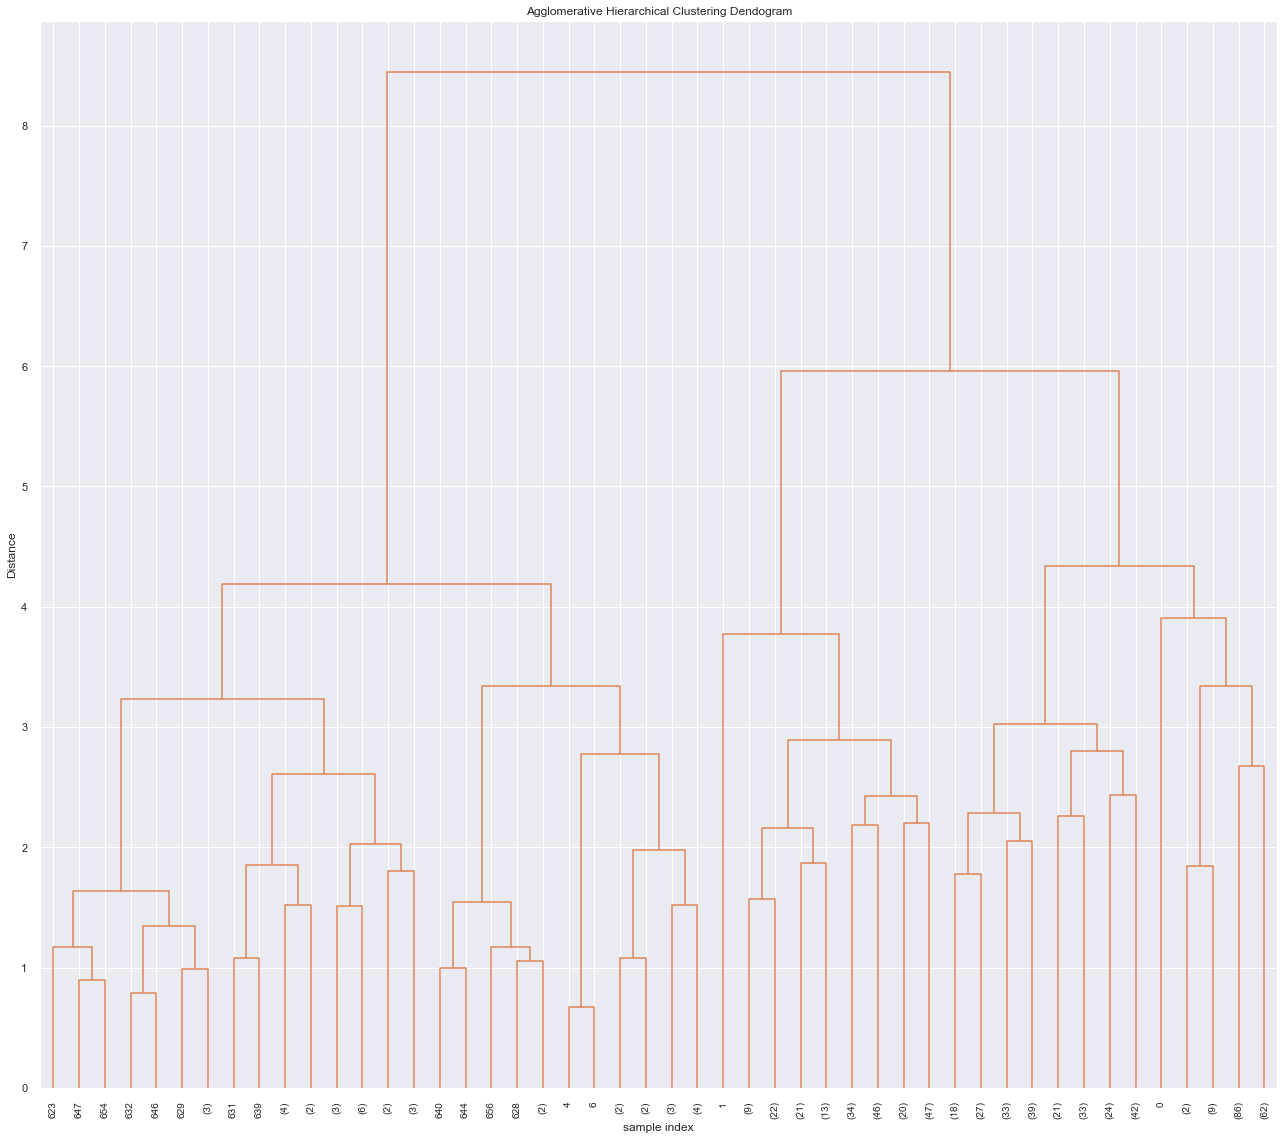

In [54]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3,leaf_rotation=90.0,p=5,color_threshold=47,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [94]:
# Lets visualize what the (average) profile of customers in those 4 clusters look like using Z3
model3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='complete')
Ward_Euclidian= model3.fit(subset_scaled_data)
data['labels'] = model3.labels_
data.head(10)
custDataClust_complete = data.groupby(['labels'])
custDataClust_complete_mean=custDataClust_complete.mean()
custDataClust_complete_mean

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
1,29331.250000,5.350000,2.318750,1.006250,2.550000,0.131250
2,12234.741784,2.352113,0.957746,3.633803,7.009390,0.995305
3,35729.957806,5.535865,4.139241,1.012658,1.729958,2.354430


In [117]:
custDataClust_complete_count=custDataClust_complete.count()
custDataClust_complete_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,50,50,50,50,50,50
1,160,160,160,160,160,160
2,213,213,213,213,213,213
3,237,237,237,237,237,237


## Z4 (Centroid)

In [56]:
# Cophenet coefficient for Z4

Z4 = linkage(subset_scaled_data, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z4 , pdist(subset_scaled_data))
c

0.8939385846326323

Cophenet is pretty good using centroid method

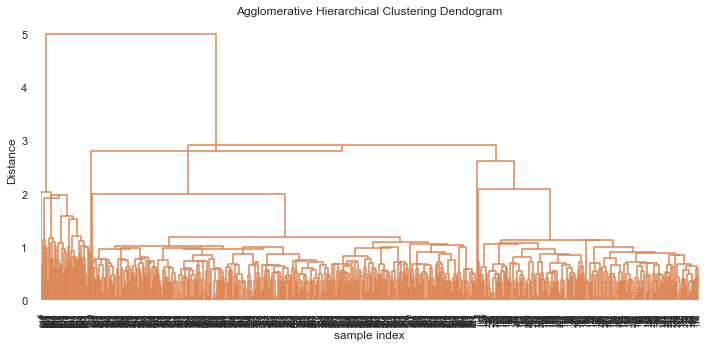

In [57]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z4, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

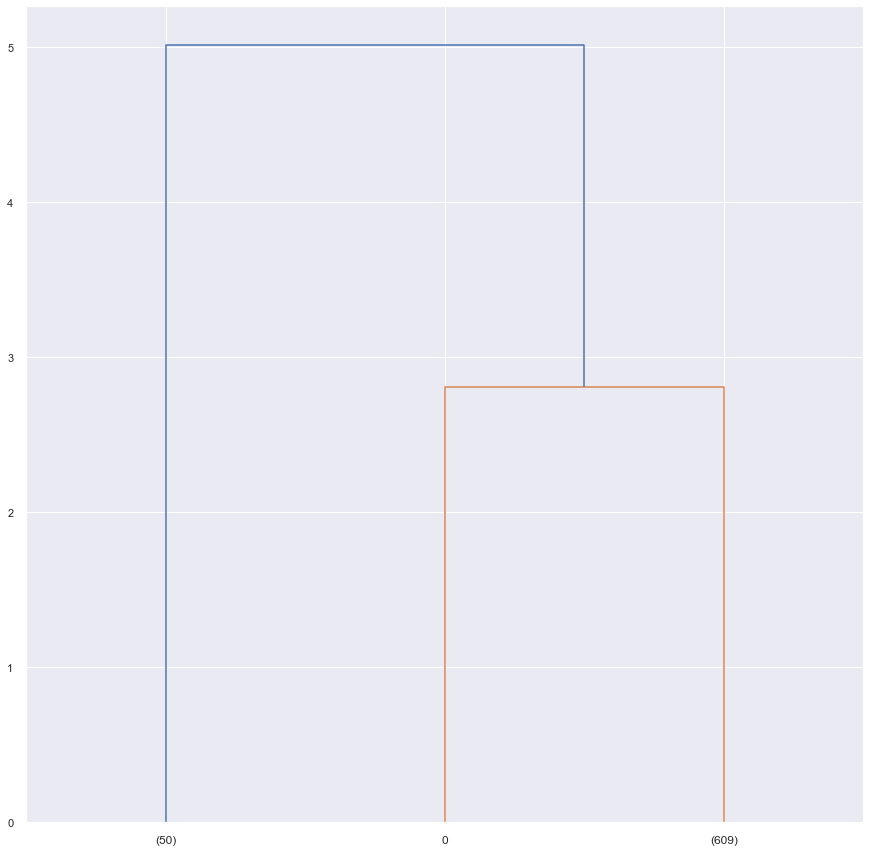

In [58]:
dendrogram(
    Z4,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

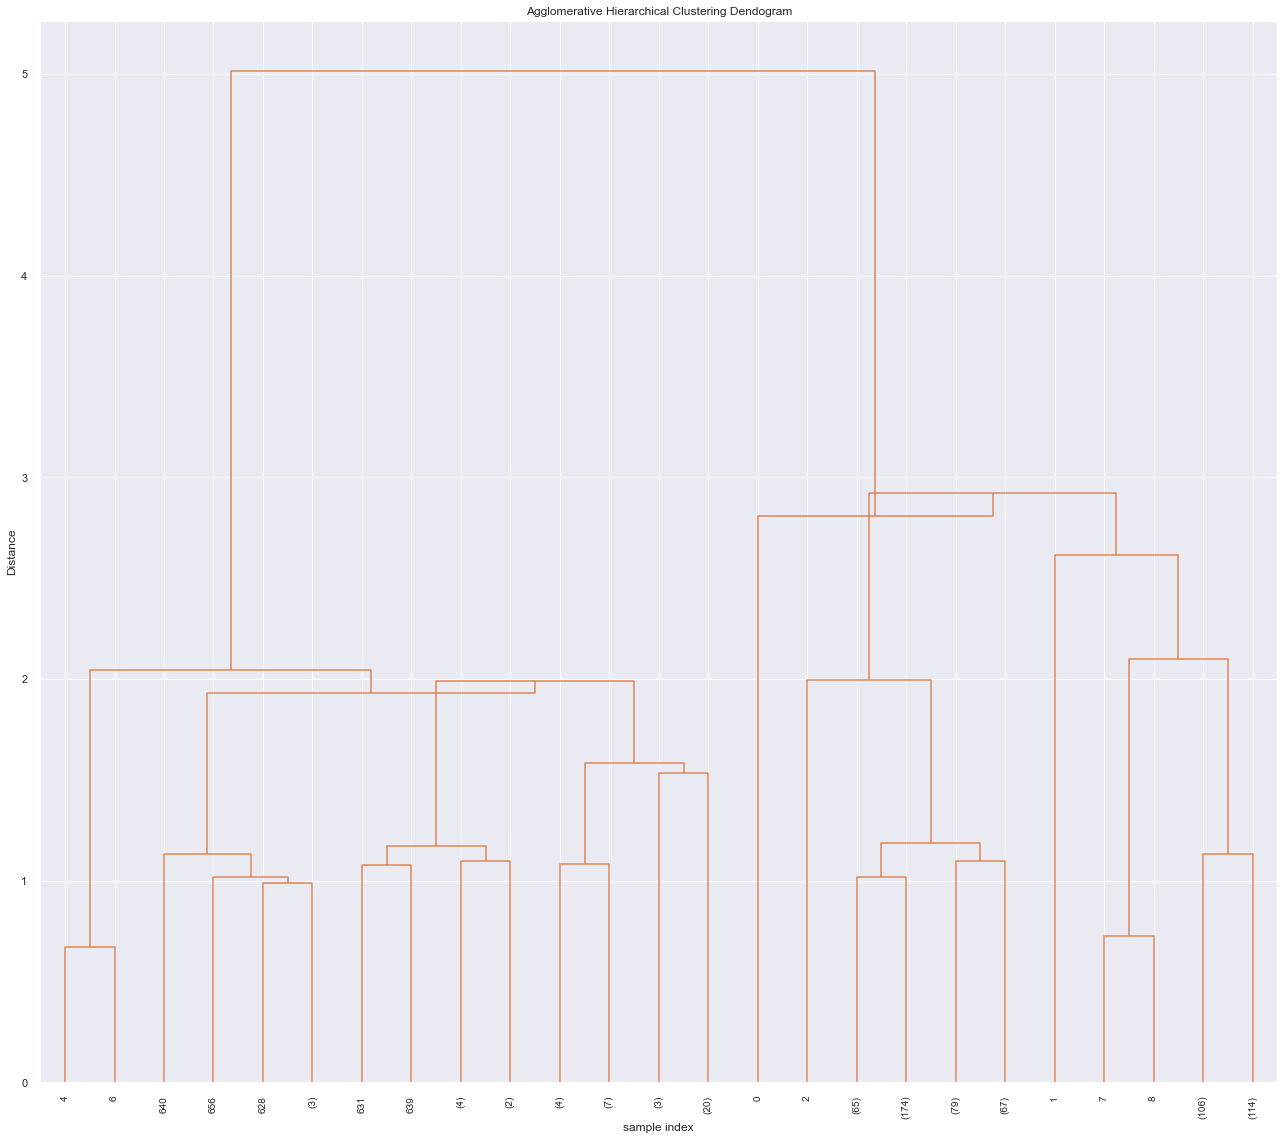

In [59]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z4,leaf_rotation=90.0,p=5,color_threshold=47,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## Average Linkage

In [60]:
# Cophenet coefficient for Z5

Z5 = linkage(subset_scaled_data, metric='euclidean', method='average')
c, coph_dists = cophenet(Z5 , pdist(subset_scaled_data))
c

0.8977080867389372

Best score close to 0.9

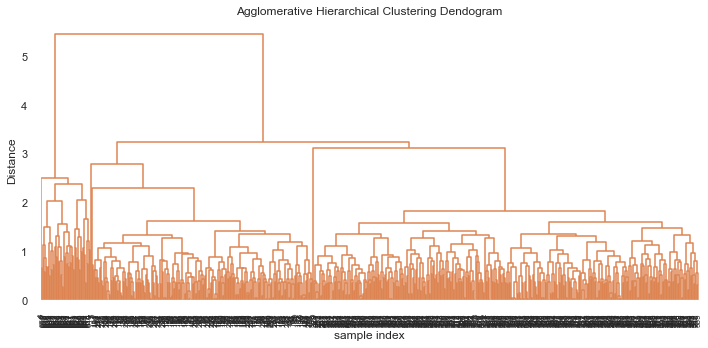

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z5, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

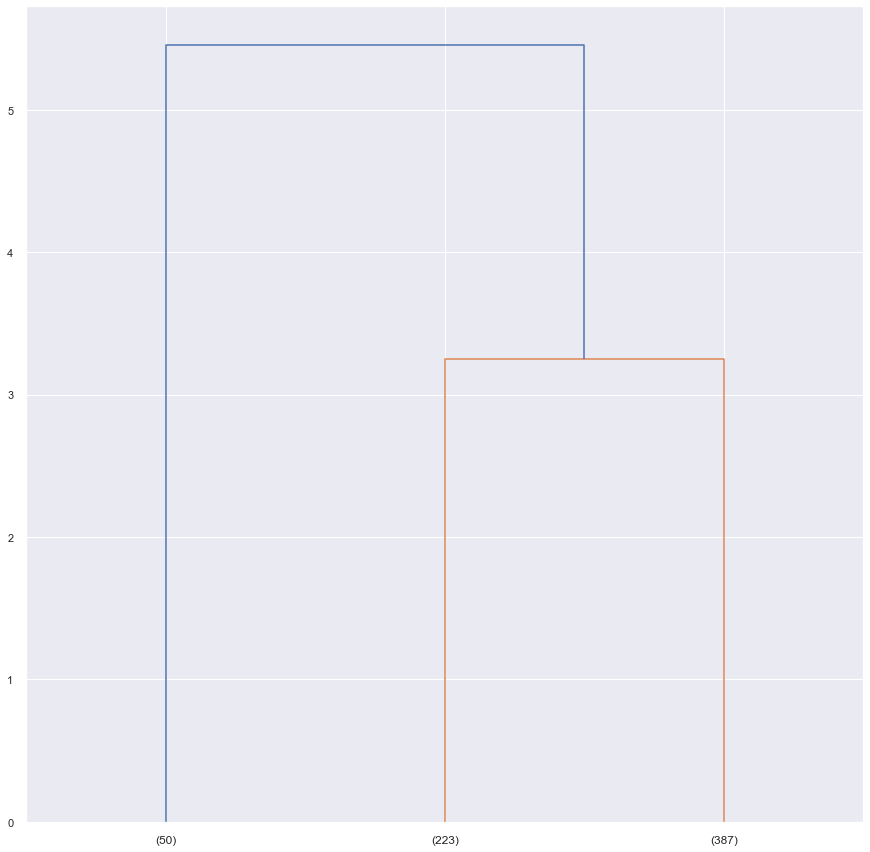

In [63]:
dendrogram(
    Z5,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

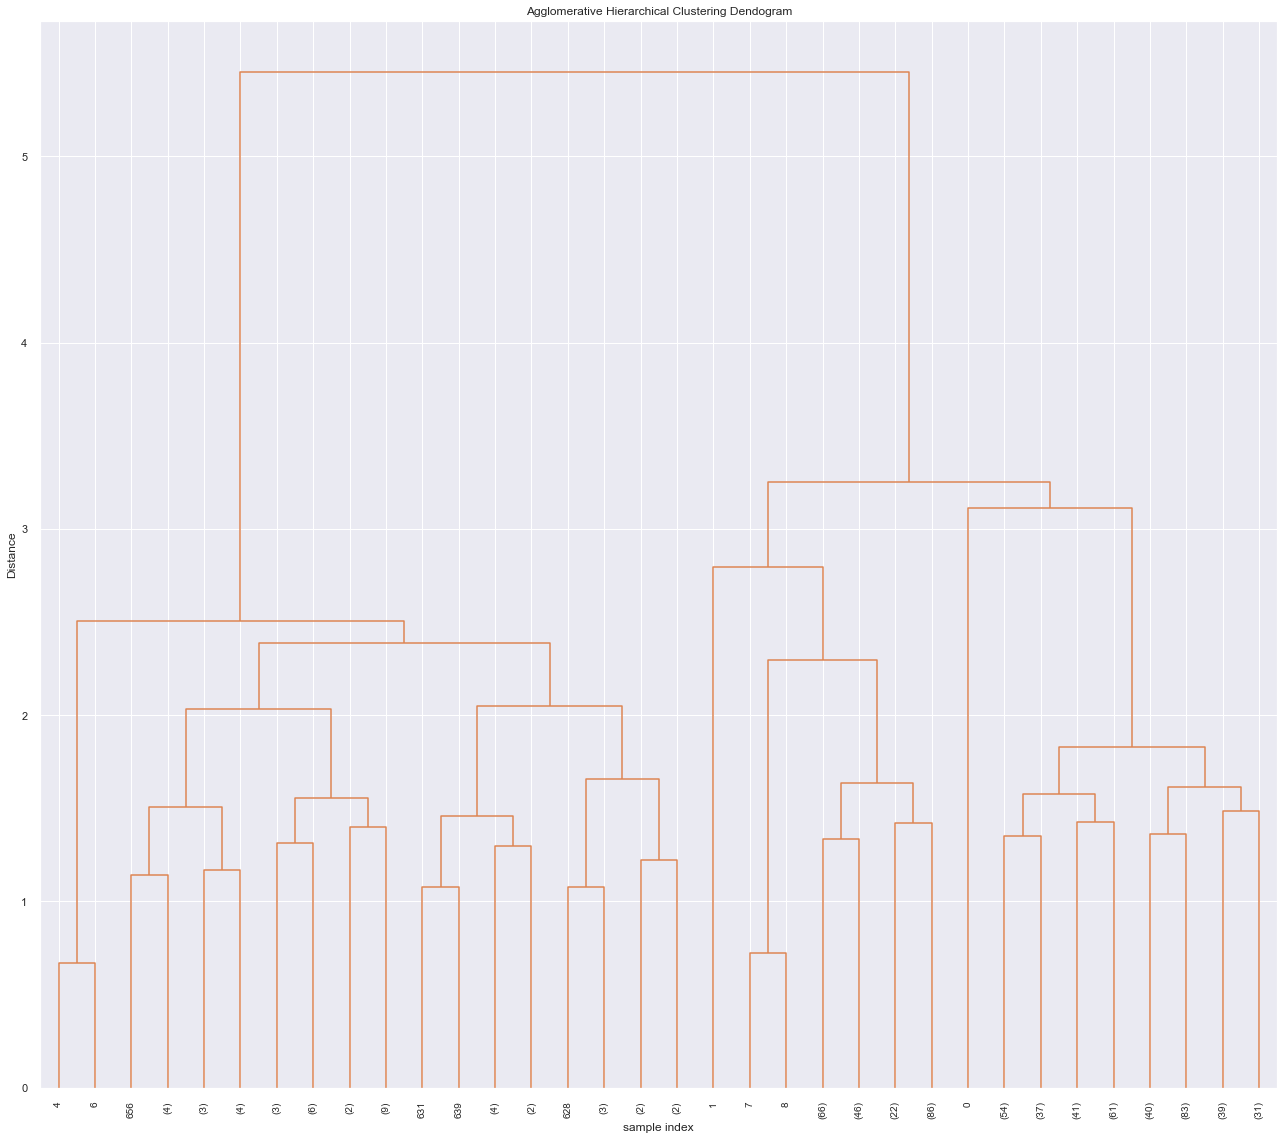

In [105]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z5,leaf_rotation=90.0,p=5,color_threshold=47,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [96]:
# Lets visualize what the (average) profile of customers in those 4 clusters look like using Z5
model5 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
Ward_Euclidian= model5.fit(subset_scaled_data)
data['labels'] = model5.labels_
data.head(10)
custDataClust_average = data.groupby(['labels'])
custDataClust_average_mean=custDataClust_average.mean()
custDataClust_average_mean

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,0.991031
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
2,33541.450777,5.520725,3.492228,0.984456,2.010363,1.476684
3,100000.000000,2.000000,1.000000,1.000000,0.000000,0.000000


In [113]:
custDataClust_average_count=custDataClust_average.count()
custDataClust_average_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,223,223,223,223,223,223
1,50,50,50,50,50,50
2,386,386,386,386,386,386
3,1,1,1,1,1,1


# Clusters Comparison
- Compare cluster K-means clusters and Hierarchical clusters 
- Perform cluster profiling
- Derive Insights



## Compare cluster K-means clusters and Hierarchical clusters 

In [146]:
cluster_profile_kmeans_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
K_means_segments,,,,,,
0,199,199,199,199,199,199
1,221,221,221,221,221,221
2,50,50,50,50,50,50
3,190,190,190,190,190,190


In [147]:
cluster_profile_kmeans_average

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
K_means_segments,,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377,1.984925
1,12167.420814,2.393665,0.927602,3.574661,6.923077,0.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000
3,31226.315789,5.478947,4.515789,1.010526,1.936842,2.000000


In [285]:
#finalKmeans=pd.merge(cluster_profile_kmeans_count,cluster_profile_kmeans_average, how='inner',on='K_means_segments')
#finalKmeans

In [286]:
#finalKmeans.columns

In [208]:
finalKmeans.rename(columns={'labels_x':'Count of customers',
                          'Avg_Credit_Limit_y':'Average Credit Limit',
                          'Total_Credit_Cards_y':'Average Total Credit Card', 
                            'Total_visits_bank_y': "Average Total Visit Bank",
                            'Total_visits_online_y': "Average Total Visit Online", 
                            'Total_calls_made_y': "Average Calls Made"                        
                           }, 
                 inplace=True)
Kmeans_averageprofile=round(finalKmeans).drop(columns=['Avg_Credit_Limit_x', 'Total_Credit_Cards_x', 'Total_visits_bank_x',
       'Total_visits_online_x', 'Total_calls_made_x', 'labels_y'])
Kmeans_averageprofile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
K_means_segments,,,,,,
0,199,35905.0,6.0,2.0,1.0,2.0
1,221,12167.0,2.0,1.0,4.0,7.0
2,50,141040.0,9.0,1.0,11.0,1.0
3,190,31226.0,5.0,5.0,1.0,2.0


## Profile Hierarchical Average Linkage

In [101]:
custDataClust_average_mean

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,0.991031
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
2,33541.450777,5.520725,3.492228,0.984456,2.010363,1.476684
3,100000.000000,2.000000,1.000000,1.000000,0.000000,0.000000


In [176]:
custDataClust_average_count

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
labels,,,,,,
0,223,223,223,223,223,223
1,50,50,50,50,50,50
2,386,386,386,386,386,386
3,1,1,1,1,1,1


In [178]:
finalHierachical_average=pd.merge(custDataClust_average_count,custDataClust_average_mean, how='inner',on='labels')
finalHierachical_average

,Avg_Credit_Limit_x,Total_Credit_Cards_x,Total_visits_bank_x,Total_visits_online_x,Total_calls_made_x,K_means_segments_x,Avg_Credit_Limit_y,Total_Credit_Cards_y,Total_visits_bank_y,Total_visits_online_y,Total_calls_made_y,K_means_segments_y
labels,,,,,,,,,,,,
0,223,223,223,223,223,223,12197.309417,2.403587,0.928251,3.560538,6.883408,0.991031
1,50,50,50,50,50,50,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
2,386,386,386,386,386,386,33541.450777,5.520725,3.492228,0.984456,2.010363,1.476684
3,1,1,1,1,1,1,100000.000000,2.000000,1.000000,1.000000,0.000000,0.000000


In [187]:
finalHierachical_average.rename(columns={'K_means_segments_x':'Count of customers',
                          'Avg_Credit_Limit_y':'Average Credit Limit',
                          'Total_Credit_Cards_y':'Average Total Credit Card', 
                            'Total_visits_bank_y': "Average Total Visit Bank",
                            'Total_visits_online_y': "Average Total Visit Online", 
                            'Total_calls_made_y': "Average Calls Made"                        
                           }, 
                 inplace=True)
Hierarchical_Average_Profile= round(finalHierachical_average).drop(columns=['Avg_Credit_Limit_x', 'Total_Credit_Cards_x', 'Total_visits_bank_x',
       'Total_visits_online_x', 'Total_calls_made_x', 'K_means_segments_y'])
Hierarchical_Average_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,223,12197.0,2.0,1.0,4.0,7.0
1,50,141040.0,9.0,1.0,11.0,1.0
2,386,33541.0,6.0,3.0,1.0,2.0
3,1,100000.0,2.0,1.0,1.0,0.0


## Profile Hierarchical Ward Linkage method

In [196]:
finalHierachical_ward= pd.merge( custDataClust_ward_count, custDataClust_ward_mean, how='inner',on='labels')
finalHierachical_ward

,Avg_Credit_Limit_x,Total_Credit_Cards_x,Total_visits_bank_x,Total_visits_online_x,Total_calls_made_x,K_means_segments_x,Avg_Credit_Limit_y,Total_Credit_Cards_y,Total_visits_bank_y,Total_visits_online_y,Total_calls_made_y,K_means_segments_y
labels,,,,,,,,,,,,
0,225,225,225,225,225,225,12151.111111,2.422222,0.937778,3.546667,6.857778,0.982222
1,191,191,191,191,191,191,38298.429319,5.670157,2.523560,0.947644,2.099476,0.109948
2,50,50,50,50,50,50,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
3,194,194,194,194,194,194,29474.226804,5.365979,4.448454,1.010309,1.891753,2.829897


In [197]:
finalHierachical_ward.rename(columns={'K_means_segments_x':'Count of customers',
                          'Avg_Credit_Limit_y':'Average Credit Limit',
                          'Total_Credit_Cards_y':'Average Total Credit Card', 
                            'Total_visits_bank_y': "Average Total Visit Bank",
                            'Total_visits_online_y': "Average Total Visit Online", 
                            'Total_calls_made_y': "Average Calls Made"                        
                           }, 
                 inplace=True)
Hierarchical_ward_Profile= round(finalHierachical_ward).drop(columns=['Avg_Credit_Limit_x', 'Total_Credit_Cards_x', 'Total_visits_bank_x',
       'Total_visits_online_x', 'Total_calls_made_x', 'K_means_segments_y'])
Hierarchical_ward_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,225,12151.0,2.0,1.0,4.0,7.0
1,191,38298.0,6.0,3.0,1.0,2.0
2,50,141040.0,9.0,1.0,11.0,1.0
3,194,29474.0,5.0,4.0,1.0,2.0


## Profile Hierarchical Complete Linkage method

In [199]:
finalHierachical_complete= pd.merge( custDataClust_complete_count, custDataClust_complete_mean, how='inner',on='labels')
finalHierachical_complete

,Avg_Credit_Limit_x,Total_Credit_Cards_x,Total_visits_bank_x,Total_visits_online_x,Total_calls_made_x,K_means_segments_x,Avg_Credit_Limit_y,Total_Credit_Cards_y,Total_visits_bank_y,Total_visits_online_y,Total_calls_made_y,K_means_segments_y
labels,,,,,,,,,,,,
0,50,50,50,50,50,50,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
1,160,160,160,160,160,160,29331.250000,5.350000,2.318750,1.006250,2.550000,0.131250
2,213,213,213,213,213,213,12234.741784,2.352113,0.957746,3.633803,7.009390,0.995305
3,237,237,237,237,237,237,35729.957806,5.535865,4.139241,1.012658,1.729958,2.354430


In [200]:
finalHierachical_complete.rename(columns={'K_means_segments_x':'Count of customers',
                          'Avg_Credit_Limit_y':'Average Credit Limit',
                          'Total_Credit_Cards_y':'Average Total Credit Card', 
                            'Total_visits_bank_y': "Average Total Visit Bank",
                            'Total_visits_online_y': "Average Total Visit Online", 
                            'Total_calls_made_y': "Average Calls Made"                        
                           }, 
                 inplace=True)
Hierarchical_complete_Profile= round(finalHierachical_complete).drop(columns=['Avg_Credit_Limit_x', 'Total_Credit_Cards_x', 'Total_visits_bank_x',
       'Total_visits_online_x', 'Total_calls_made_x', 'K_means_segments_y'])
Hierarchical_complete_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,50,141040.0,9.0,1.0,11.0,1.0
1,160,29331.0,5.0,2.0,1.0,3.0
2,213,12235.0,2.0,1.0,4.0,7.0
3,237,35730.0,6.0,4.0,1.0,2.0


## Profile Hierarchical Single Linkage method


In [204]:
finalHierachical_single= pd.merge(custDataClust_single_count, custDataClust_single_mean, how='inner',on='labels')
finalHierachical_single

,Avg_Credit_Limit_x,Total_Credit_Cards_x,Total_visits_bank_x,Total_visits_online_x,Total_calls_made_x,K_means_segments_x,Avg_Credit_Limit_y,Total_Credit_Cards_y,Total_visits_bank_y,Total_visits_online_y,Total_calls_made_y,K_means_segments_y
labels,,,,,,,,,,,,
0,50,50,50,50,50,50,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
1,1,1,1,1,1,1,50000.000000,3.000000,0.000000,10.000000,9.000000,1.000000
2,608,608,608,608,608,608,25685.855263,4.381579,2.557566,1.914474,3.786184,1.299342
3,1,1,1,1,1,1,100000.000000,2.000000,1.000000,1.000000,0.000000,0.000000


In [205]:
finalHierachical_single.rename(columns={'K_means_segments_x':'Count of customers',
                          'Avg_Credit_Limit_y':'Average Credit Limit',
                          'Total_Credit_Cards_y':'Average Total Credit Card', 
                            'Total_visits_bank_y': "Average Total Visit Bank",
                            'Total_visits_online_y': "Average Total Visit Online", 
                            'Total_calls_made_y': "Average Calls Made"                        
                           }, 
                 inplace=True)
Hierarchical_single_Profile= round(finalHierachical_single).drop(columns=['Avg_Credit_Limit_x', 'Total_Credit_Cards_x', 'Total_visits_bank_x',
       'Total_visits_online_x', 'Total_calls_made_x', 'K_means_segments_y'])
Hierarchical_single_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,50,141040.0,9.0,1.0,11.0,1.0
1,1,50000.0,3.0,0.0,10.0,9.0
2,608,25686.0,4.0,3.0,2.0,4.0
3,1,100000.0,2.0,1.0,1.0,0.0


## Lets recap all

In [257]:
# Summary of Kmeans (K=4) cluster profile
Kmeans_averageprofile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
K_means_segments,,,,,,
0,199,35905.0,6.0,2.0,1.0,2.0
1,221,12167.0,2.0,1.0,4.0,7.0
2,50,141040.0,9.0,1.0,11.0,1.0
3,190,31226.0,5.0,5.0,1.0,2.0


In [264]:
subset2=Kmeans_averageprofile
subset_scaled_kmeans=scaler.fit_transform(subset2)   
subset_scaled_kmeans_averageprofile=pd.DataFrame(subset_scaled_kmeans,columns=subset2.columns)
subset_scaled_kmeans_averageprofile.index.name ='K_means_segments'
subset_scaled_kmeans_averageprofile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
K_means_segments,,,,,,
0,0.504855,-0.380420,0.2,-0.152499,-0.795587,-0.426401
1,0.831525,-0.851257,-1.4,-0.762493,-0.061199,1.705606
2,-1.707596,1.704904,1.4,-0.762493,1.652373,-0.852803
3,0.371217,-0.473227,-0.2,1.677484,-0.795587,-0.426401


In [287]:
#subset_scaled_kmeans_averageprofile.boxplot(by="K_means_segments", layout = (2,4),figsize=(20,10))

K means provide the following profiling of clients: 
- Group 0: This is a Group of 199 clients who has average credit limit (36k), a high number of credit card (6) but who is not very active in terms of online visit (1), number of bank visit (2) or call (2). 
- Group 1: This is a Group of 221 clients with small credit limit (12k), small amount of credit card (2), with limited amount of visit to the Bank (1) but high number of online (4) and call (7).
- Group 2: This is a cluster of 50 clients characterized by very high credit limit (141K), very high number of credit card (9), very high number online visit (11) but very low amount of call (1) and bank visit (1). We can define this group as ideal customer for the Bank and call them as big spender and autonomous. 
- Group 3: This is a cluser of 190 clients with average credit limit (31k), high number of credit card (5) with limited online and call visit (1 and 2 respectively) but who pays numerous visit to the Bank (5).


In [211]:
Hierarchical_single_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,50,141040.0,9.0,1.0,11.0,1.0
1,1,50000.0,3.0,0.0,10.0,9.0
2,608,25686.0,4.0,3.0,2.0,4.0
3,1,100000.0,2.0,1.0,1.0,0.0


Single Linkage Method provides the following profiles:
- Group 0 is the same as Group 2 in Kmeans, i.e. cluster of 50 clients characterized by very high credit limit (141K), very high number of credit card (9) and a lot of online visit (11)
- Group 1 is an outlier
- Group 2 is a very large group of 608 clients with slightly below average credit limit (26k vs average of 35k) and other features being close to average (number of credit card number of bank visit, online visit, call).
- Group 3 is an outlier

In Conclusion single Linkage Method is very sensitive to outliers and does provide in fact only 2 real clusters. The second real clusters is an aggregate of all cases which do not fall into Group 0 and as such not really informative. So Linkage Method (k=4) is not a great clustering method.



In [212]:
Hierarchical_complete_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,50,141040.0,9.0,1.0,11.0,1.0
1,160,29331.0,5.0,2.0,1.0,3.0
2,213,12235.0,2.0,1.0,4.0,7.0
3,237,35730.0,6.0,4.0,1.0,2.0


Complete Linkage method provides the following profiles:
- Cluster 0 is the same as Group 2 in Kmeans with same number of clients. 
- Cluster 1 (160 clients) shows some similarities to Group 3 from Kmeans with average credit limit (29k vs 31k), high number of credit card (5 same as Kmeans) with limited online and call visit (1 and 3 vs 1 and 2) but less visit to the Bank (2 vs 5).
- Cluster 2 (213 clients) very similar Group 1 in Kmeans (i.e. with small credit limit (12k), small amount of credit card (2), with limited amount of visit to the Bank (1) but high number of online (4) and call (7).
- Cluster 3 (237 clients) which is very similar to the Group 0 in Kmeans (i.e. average credit limit (36k), a high number of credit card (6) but limited number of online visit (1), bank visit) (2) or call (2).

In conclusion, Complete Linkage method provides a similar type of grouping than Kmeans. The distribution f the client within those 4 clusters is also pretty even and clost to Kmeans.

In [281]:
Hierarchical_ward_Profile

Ward linkage:
- Group 0: very similar to group 1 of Kmeans, also in terms of number of customers.
- Group 1: Very similar to Group 0 in Kmeans also in terms of number of customers
- Group 2: same group as Group 2 of Kmeans. 
- Group 3: very similar to Group 3 of Kmeans also in terms of number of customers.

Conclusion Ward: very similar to Kmeans in terms of clustering.

In [216]:
Hierarchical_Average_Profile

,Count of customers,Average Credit Limit,Average Total Credit Card,Average Total Visit Bank,Average Total Visit Online,Average Calls Made
labels,,,,,,
0,223,12197.0,2.0,1.0,4.0,7.0
1,50,141040.0,9.0,1.0,11.0,1.0
2,386,33541.0,6.0,3.0,1.0,2.0
3,1,100000.0,2.0,1.0,1.0,0.0


Average linkage gives the following cluster profiles:
- Group 0: is very similar to Group 1 in Kmeans (small credit limits, lot of calls and online visit)
- Group 1: is the same as Group 2 in Kmeans (big credit limit, lot of online and limited visit/call)
- Group 2: aggregate of all customers who do not fall into Group 1 and 2 (medium credit limit etc).
- Group 3: only one outlier.

Conclusion Average linkage: Use similar pattern as Kmeans except it groups all average credit limit users in one group, effectively having 3 clusters.

# Derive Insights, Business conclusion and Recommendation




Kmeans provide quite similar results to Hierarchical model using Ward and Complete Linkage.

Single linkage model and Average linkage model tends to reduce the effective number of clusters and provides less granularities/information on the clusters and thus are less recommended. 

Single and Ward model offers a lower cophenet coefficient than complete and average linkage. Consequently, from the above, we recommend the use of Complete Linkage (sufficient granularities and high cophenet coefficient) or Kmeans for clustering. 

Using clustering with K=4 and using different model gives the following outcomes:
** 2 Groups are clearly identified and appear on all models outcomes: 
    - A Group of 50 customers who have very high credit limit and have minimum interaction with the Bank as they do everything online
    - A group of around 225 customers who have small credit limit and interact a lot by phone with the Bank
 Those two "extreme" groups represent about half of the customers.
** Depending on the models, the rest of the customers (average credit limit) are either grouped together in a single third Group (Average Linkage Method)or split in 2 sub groups with the main segregating factor being the number of visit to the Bank.

Using Kmeans and Hierachical clusterings with various linkage method helped us to identify 4 type of customers:

- Customer 1: A Group of about 7.5% of customers who are high credit card users and whose online interactions with the Bank are mostly online. Those are ideals customers in terms of high revenue generation and low cost of managing those customers/limited complains.
- Customer 2: The other extreme Group of about 34% of customers who have the smallest credit limits but who interacts a lot by phone with the Bank. This group generates less revenues and amount of interactions with the Bank on the phone may indicates some hotline inefficiencies.
- Customer 3: A Group representing between 28% to 35% of customers with average credit card limit who visit a lot the Bank and do not use online and phone call service a lot. 
- Customer 4: A Group representing between 24% to 30% of customers also with average credit card limit who have minimum interactions with the Bank (do not visit the bank a lot and do not use online and phone service that much). 

- Group 1 and Group 4 are ideals for the Bank in terms of cost/revenue. 
** Recommendation would be :
- to improve online services in order to reduce the need for customer 2 to call the bank and for customer 3 to visit the Bank.
- to personalise the credit card offering and to simplify its use to reduce the number of customers 2 and 3.
